In [29]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta



import cartopy
from cartopy import crs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

from netCDF4 import Dataset

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



import matplotlib
matplotlib.use("template")
import numpy as np
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
from   datetime import datetime
import h5py

In [27]:
import matplotlib

arraytemp=[[255,255,255],[0,50,100],[0,144,144],[0,240,240],[128,224,80],[100,184,64],[72,144,48],\
                   [44,104,32],[16,64,16],[240,192,16],[240,128,32],[240,16,32],\
                   [144,0,0],[176,32,128],[202,64,160],[229,96,192],[225,128,224]]

arraytemp=np.array(arraytemp)/255.
cmap_mio_Acum = matplotlib.colors.ListedColormap(arraytemp)

clevs=[0,25,50,100,150,200,300,400,500,600,700,800,900,1000,1200,1300,1400]
norm = matplotlib.colors.BoundaryNorm(clevs, cmap_mio_Acum.N)


In [2]:
Data = Dataset('CMED_3D_20191231_235722.nc')
#Lats = np.array(Data.variables['lat'])
#Lons = np.array(Data.variables['lon'])
#u_wind = np.array(Data.variables['uwnd'])


In [40]:
Data = Dataset('/home/choyos/DATA/RADAR/201404240618_010_120.nc')
Data.variables

OrderedDict([('Conv_Strat', <class 'netCDF4._netCDF4.Variable'>
              int32 Conv_Strat(ncols, nrows)
              unlimited dimensions: 
              current shape = (1728, 1728)
              filling on, default _FillValue of -2147483647 used),
             ('Rain', <class 'netCDF4._netCDF4.Variable'>
              int32 Rain(ncols, nrows)
              unlimited dimensions: 
              current shape = (1728, 1728)
              filling on, default _FillValue of -2147483647 used)])

In [3]:
Data.variables

OrderedDict([('DBZ_H', <class 'netCDF4._netCDF4.Variable'>
              float32 DBZ_H(time, altitude, latitude, longitude)
                  units: dBZ
                  long_name: CMED Reflectivity_h
                  missing_value: -999.0
              unlimited dimensions: time
              current shape = (1, 23, 481, 481)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('VEL_H', <class 'netCDF4._netCDF4.Variable'>
              float32 VEL_H(time, altitude, latitude, longitude)
                  units: m/s
                  long_name: radial_velocity_h
                  missing_value: -999.0
              unlimited dimensions: time
              current shape = (1, 23, 481, 481)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: seconds since 1970-01-01 00:00:00 +0000
              unlimited dimensio

In [36]:
PPT = np.array(Data['rain_rate'])[0]

In [37]:
PPT

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

In [35]:
file = 'CMED_3D_20191231_235722.nc'
datatemp = np.array(Dataset(file).variables['rain_rate'][:][0])

In [38]:
Dataset(file).variables

OrderedDict([('DBZ_H', <class 'netCDF4._netCDF4.Variable'>
              float32 DBZ_H(time, altitude, latitude, longitude)
                  units: dBZ
                  long_name: CMED Reflectivity_h
                  missing_value: -999.0
              unlimited dimensions: time
              current shape = (1, 23, 481, 481)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('VEL_H', <class 'netCDF4._netCDF4.Variable'>
              float32 VEL_H(time, altitude, latitude, longitude)
                  units: m/s
                  long_name: radial_velocity_h
                  missing_value: -999.0
              unlimited dimensions: time
              current shape = (1, 23, 481, 481)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: seconds since 1970-01-01 00:00:00 +0000
              unlimited dimensio

In [184]:
Mask = np.array(Dataset(file).variables['rain_type'][:][0])

In [185]:
stratiform = np.ma.masked_where(Mask != 1, datatemp)
stratiform[stratiform.mask] = 0
stratiform = np.array(stratiform)

convective = np.ma.masked_where(Mask != 2, datatemp)
convective[convective.mask] = 0
convective = np.array(convective)

In [206]:
Mask[Mask == 0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
from   datetime import datetime
import h5py


path  = '/mnt/data/Radar_TipoEvento/ppi_all'

Hours = pd.date_range('2019-05-01 00:00', '2019-05-10 23:59', freq='1H')

Acumulados_Convectivo   = np.empty([481,481,len(Hours)])
Acumulados_Estratiforme = np.empty([481,481,len(Hours)])
Acumulados_Other = np.empty([481,481,len(Hours)])

for idd,j in enumerate(Hours):
    print (j)
    files = sorted(glob.iglob(path + datetime.strftime(j,'/%Y/%Y%m%d/*%Y%m%d_%H') +"*"), key = os.path.getmtime)

    StratiformTemp = np.zeros([481,481])
    ConvectiveTemp = np.zeros([481,481])
    OtherTemp      = np.zeros([481,481])

    if len(files) >= 5:
        for file in files:
                try:
                    print (file)
                    os.system('gunzip ' + file)
                    datatemp   = Dataset(file[:-3]).variables['rain_rate'][:]/2
                    datatemp   = datatemp[0,:,:]
                    Mask       = np.array(Dataset(file[:-3]).variables['rain_type'][:][0])
                    os.system('gzip ' + file[:-3])

                    stratiform = np.ma.masked_where(Mask != 1, datatemp)
                    stratiform[stratiform.mask] = 0
                    stratiform = np.array(stratiform)
                    stratiform[stratiform < 0]  = 0

                    convective = np.ma.masked_where(Mask != 2, datatemp)
                    convective[convective.mask] = 0
                    convective = np.array(convective)
                    convective[convective < 0]  = 0

                    Other = np.ma.masked_where(Mask != 3, datatemp)
                    Other[Other.mask] = 0
                    Other = np.array(Other)
                    Other[Other < 0]  = 0
                                        
                    StratiformTemp = StratiformTemp + stratiform[:,:]
                    ConvectiveTemp = ConvectiveTemp + convective[:,:]
                    OtherTemp      = OtherTemp      + Other[:,:]
                    
                except:
                    pass
                
        Acumulados_Convectivo[:,:,idd]   = ConvectiveTemp / np.float(len(files))
        Acumulados_Estratiforme[:,:,idd] = StratiformTemp / np.float(len(files))
        Acumulados_Other[:,:,idd]        = OtherTemp / np.float(len(files))
        
    else:
        Acumulados_Convectivo[:,:,idd]   = np.zeros([481,481]) * np.NaN
        Acumulados_Estratiforme[:,:,idd] = np.zeros([481,481]) * np.NaN
        Acumulados_Other[:,:,idd]        = np.zeros([481,481]) * np.NaN

np.save('npy_files/Convectivo_AcumuladosHora', Acumulados_Convectivo)
np.save('npy_files/Estratiforme_AcumuladosHora', Acumulados_Estratiforme)
np.save('npy_files/Otros_AcumuladosHora', Acumulados_Other)

del Acumulados_Convectivo
del Acumulados_Estratiforme
del Acumulados_Other

del ConvectiveTemp
del StratiformTemp
del OtherTemp



2019-05-01 00:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_000553.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_001616.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_002640.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_003703.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_004727.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_005750.nc.gz
2019-05-01 01:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_010814.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_011837.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_012901.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_013925.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_014949.nc.gz
2019-05-01 02:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_02001

/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_172505.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_173529.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_174552.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_175616.nc.gz
2019-05-01 18:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_180639.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_181703.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_182726.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_183750.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_184813.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_185837.nc.gz
2019-05-01 19:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_190901.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190501/CMED_3D_20190501_191924.nc.gz
/mnt/data/Ra

/mnt/data/Radar_TipoEvento/ppi_all/2019/20190502/CMED_3D_20190502_104928.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190502/CMED_3D_20190502_105952.nc.gz
2019-05-02 11:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190502/CMED_3D_20190502_111015.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190502/CMED_3D_20190502_112038.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190502/CMED_3D_20190502_113102.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190502/CMED_3D_20190502_114125.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190502/CMED_3D_20190502_115149.nc.gz
2019-05-02 12:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190502/CMED_3D_20190502_120212.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190502/CMED_3D_20190502_121236.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190502/CMED_3D_20190502_122259.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190502/CMED_3D_20190502_123323.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190502/CMED_3D_20190502_124347.nc.gz
/mnt/data/Ra

/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_041352.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_042416.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_043440.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_044503.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_045527.nc.gz
2019-05-03 05:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_050551.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_051614.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_052637.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_053701.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_054724.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_055748.nc.gz
2019-05-03 06:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_060811.nc.gz
/mnt/data/Ra

/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_213304.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_214327.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_215351.nc.gz
2019-05-03 22:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_220414.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_221437.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_222501.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_223525.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_224550.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_225613.nc.gz
2019-05-03 23:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_230637.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_231700.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190503/CMED_3D_20190503_232724.nc.gz
/mnt/data/Ra

2019-05-04 15:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190504/CMED_3D_20190504_150242.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190504/CMED_3D_20190504_151305.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190504/CMED_3D_20190504_152329.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190504/CMED_3D_20190504_153353.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190504/CMED_3D_20190504_154416.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190504/CMED_3D_20190504_155440.nc.gz
2019-05-04 16:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190504/CMED_3D_20190504_160503.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190504/CMED_3D_20190504_161527.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190504/CMED_3D_20190504_162550.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190504/CMED_3D_20190504_163614.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190504/CMED_3D_20190504_164637.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190504/CMED_3D_20190504_165700.nc.gz
2019-05-04 1

/mnt/data/Radar_TipoEvento/ppi_all/2019/20190505/CMED_3D_20190505_082704.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190505/CMED_3D_20190505_083727.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190505/CMED_3D_20190505_084751.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190505/CMED_3D_20190505_085814.nc.gz
2019-05-05 09:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190505/CMED_3D_20190505_090837.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190505/CMED_3D_20190505_091901.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190505/CMED_3D_20190505_092924.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190505/CMED_3D_20190505_093948.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190505/CMED_3D_20190505_095011.nc.gz
2019-05-05 10:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190505/CMED_3D_20190505_100035.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190505/CMED_3D_20190505_101059.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190505/CMED_3D_20190505_102123.nc.gz
/mnt/data/Ra

/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_015126.nc.gz
2019-05-06 02:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_020150.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_021213.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_022236.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_023300.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_024323.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_025347.nc.gz
2019-05-06 03:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_030410.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_031434.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_032457.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_033521.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_034544.nc.gz
/mnt/data/Ra

2019-05-06 19:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_190712.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_191735.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_192758.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_193821.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_194844.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_195907.nc.gz
2019-05-06 20:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_200930.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_201954.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_203017.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_204040.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_205103.nc.gz
2019-05-06 21:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190506/CMED_3D_20190506_21012

/mnt/data/Radar_TipoEvento/ppi_all/2019/20190507/CMED_3D_20190507_123100.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190507/CMED_3D_20190507_124123.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190507/CMED_3D_20190507_125146.nc.gz
2019-05-07 13:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190507/CMED_3D_20190507_130209.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190507/CMED_3D_20190507_131232.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190507/CMED_3D_20190507_132255.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190507/CMED_3D_20190507_133318.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190507/CMED_3D_20190507_134342.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190507/CMED_3D_20190507_135406.nc.gz
2019-05-07 14:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190507/CMED_3D_20190507_140429.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190507/CMED_3D_20190507_141452.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190507/CMED_3D_20190507_142515.nc.gz
/mnt/data/Ra

/mnt/data/Radar_TipoEvento/ppi_all/2019/20190508/CMED_3D_20190508_094550.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190508/CMED_3D_20190508_095613.nc.gz
2019-05-08 10:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190508/CMED_3D_20190508_100637.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190508/CMED_3D_20190508_101700.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190508/CMED_3D_20190508_102723.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190508/CMED_3D_20190508_103746.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190508/CMED_3D_20190508_104810.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190508/CMED_3D_20190508_105833.nc.gz
2019-05-08 11:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190508/CMED_3D_20190508_110856.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190508/CMED_3D_20190508_111920.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190508/CMED_3D_20190508_112943.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190508/CMED_3D_20190508_114006.nc.gz
/mnt/data/Ra

2019-05-09 03:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_030422.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_031445.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_032508.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_033531.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_034554.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_035617.nc.gz
2019-05-09 04:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_040640.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_041703.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_042726.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_043750.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_044813.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_045836.nc.gz
2019-05-09 0

/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_231439.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_232503.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_233526.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_234549.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190509/CMED_3D_20190509_235612.nc.gz
2019-05-10 00:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_001146.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_002210.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_003233.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_004256.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_005319.nc.gz
2019-05-10 01:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_010342.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_011405.nc.gz
/mnt/data/Ra

/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_163835.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_164858.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_165921.nc.gz
2019-05-10 17:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_170944.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_172007.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_173031.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_174054.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_175117.nc.gz
2019-05-10 18:00:00
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_180141.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_181204.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_182227.nc.gz
/mnt/data/Radar_TipoEvento/ppi_all/2019/20190510/CMED_3D_20190510_183251.nc.gz
/mnt/data/Ra

In [86]:
Tipo = 'Otros'

File = 'npy_files/'+ Tipo +'_AcumuladosHora.npy'

X = np.load(File, mmap_mode='r')
X = np.array(X[:,:,:])

P_99_9 = np.zeros([X.shape[0], X.shape[1]]) * np.NaN
P_99   = np.zeros([X.shape[0], X.shape[1]]) * np.NaN
P_95   = np.zeros([X.shape[0], X.shape[1]]) * np.NaN

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Serie = X[i,j,:][np.isfinite(X[i,j,:])]

        try:
            P_99_9[i,j] = np.percentile(Serie[Serie > 0],99.9)
            P_99[i,j]   = np.percentile(Serie[Serie > 0],99)
            P_95[i,j]   = np.percentile(Serie[Serie > 0],95)
        except:
            P_99_9[i,j] = np.NaN
            P_99[i,j]   = np.NaN
            P_95[i,j]   = np.NaN

np.save('npy_files/'+ Tipo +'_P99_9', P_99_9)
np.save('npy_files/'+ Tipo +'_P99', P_99)
np.save('npy_files/'+ Tipo +'_P95', P_95)


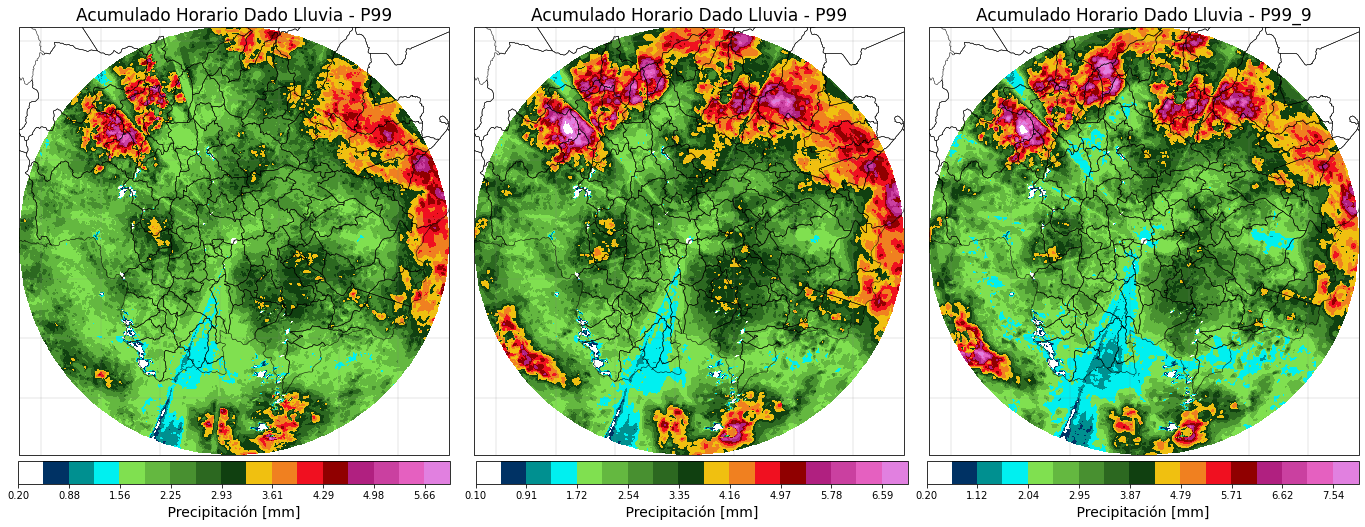

In [99]:
file = 'CMED_3D_20191231_235722.nc'

Latitud  = Dataset(file).variables['latitude'][:]
Longitud = Dataset(file).variables['longitude'][:]


fig = plt.figure(figsize = [24,8])
plt.subplots_adjust(wspace=0.06, hspace=0.1)


# ---------------------------------------------------------------------------------------------------
ax = fig.add_subplot(1, 3, 1, projection=crs.PlateCarree())

ax.set_xlim(Longitud[0], Longitud[-1])
ax.set_ylim(Latitud[0], Latitud[-1])

P = np.load('npy_files/Estratiforme_P95.npy')

           
im    = ax.contourf(Longitud, Latitud, P, levels=np.linspace(0.2,6,18), cmap = cmap_mio_Acum)
        
ax.set_title('Acumulado Horario Dado Lluvia - P99',fontsize=17)
        
#gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=0.2, color='gray')
gl = ax.gridlines(crs=crs.PlateCarree(),  linewidth=0.2, color='gray')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fname = '/home/choyos/PROYECTOS/Colciencias_EventosExtremos/shapes/shpMunicipiosAntioquia.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                        crs.PlateCarree(), facecolor='none', edgecolor='k',linewidths=0.5)
ax.add_feature(shape_feature)
        
cbaxes = fig.add_axes([0.1243, 0.08, 0.25, 0.04]) 
cb = plt.colorbar(im, orientation='horizontal', cax = cbaxes, format='%.2f')  
cb.set_label(u' Precipitación [mm] ',fontsize=14)

# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------
ax = fig.add_subplot(1, 3, 2, projection=crs.PlateCarree())

ax.set_xlim(Longitud[0], Longitud[-1])
ax.set_ylim(Latitud[0], Latitud[-1])

P = np.load('npy_files/Estratiforme_P99.npy')

           
im    = ax.contourf(Longitud, Latitud, P, levels=np.linspace(0.1,7.0,18),cmap = cmap_mio_Acum)
        
ax.set_title('Acumulado Horario Dado Lluvia - P99',fontsize=17)
        
#gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=0.2, color='gray')
gl = ax.gridlines(crs=crs.PlateCarree(),  linewidth=0.2, color='gray')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fname = '/home/choyos/PROYECTOS/Colciencias_EventosExtremos/shapes/shpMunicipiosAntioquia.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                        crs.PlateCarree(), facecolor='none', edgecolor='k',linewidths=0.5)
ax.add_feature(shape_feature)
        
cbaxes = fig.add_axes([0.389, 0.08, 0.25, 0.04]) 
cb = plt.colorbar(im, orientation='horizontal', cax = cbaxes, format='%.2f')  
cb.set_label(u' Precipitación [mm] ',fontsize=14)

# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------
ax = fig.add_subplot(1, 3, 3, projection=crs.PlateCarree())

ax.set_xlim(Longitud[0], Longitud[-1])
ax.set_ylim(Latitud[0], Latitud[-1])

P     = np.load('npy_files/Estratiforme_P99_9.npy')
im    = ax.contourf(Longitud, Latitud, P, levels=np.linspace(0.2,8.0,18), cmap = cmap_mio_Acum)
        
ax.set_title('Acumulado Horario Dado Lluvia - P99_9',fontsize=17)
        
#gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=0.2, color='gray')
gl = ax.gridlines(crs=crs.PlateCarree(),  linewidth=0.2, color='gray')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fname = '/home/choyos/PROYECTOS/Colciencias_EventosExtremos/shapes/shpMunicipiosAntioquia.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                        crs.PlateCarree(), facecolor='none', edgecolor='k',linewidths=0.5)
ax.add_feature(shape_feature)
        
cbaxes = fig.add_axes([0.65, 0.08, 0.25, 0.04]) 
cb = plt.colorbar(im, orientation='horizontal', cax = cbaxes, format='%.2f')  
cb.set_label(u' Precipitación [mm] ',fontsize=14)

# ---------------------------------------------------------------------------------------------------



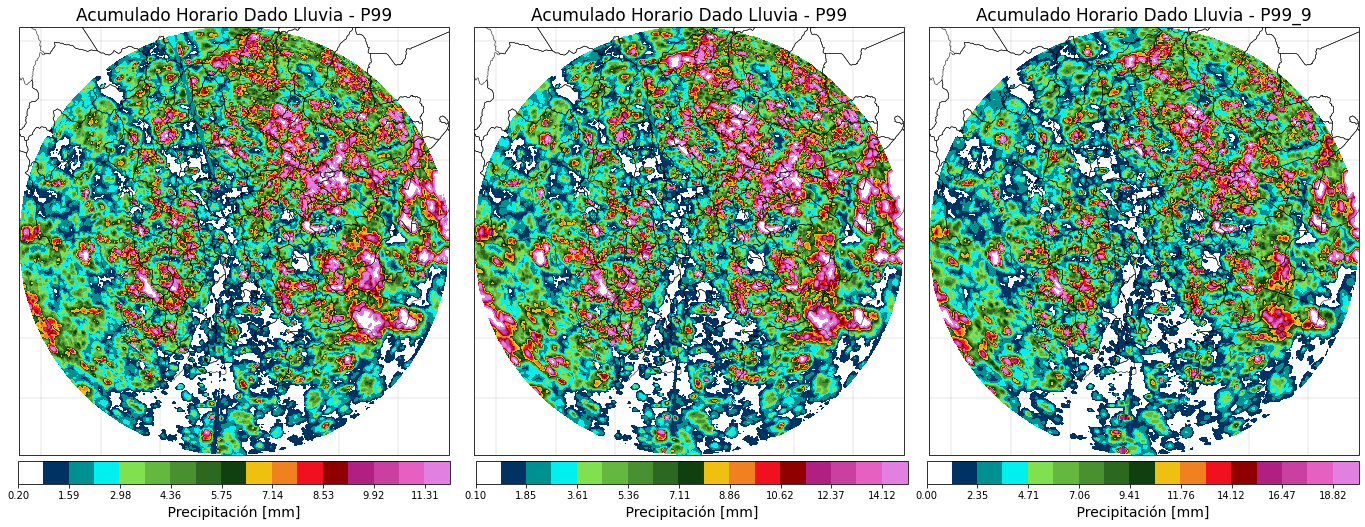

In [104]:
file = 'CMED_3D_20191231_235722.nc'

Latitud  = Dataset(file).variables['latitude'][:]
Longitud = Dataset(file).variables['longitude'][:]


fig = plt.figure(figsize = [24,8])
plt.subplots_adjust(wspace=0.06, hspace=0.1)


# ---------------------------------------------------------------------------------------------------
ax = fig.add_subplot(1, 3, 1, projection=crs.PlateCarree())

ax.set_xlim(Longitud[0], Longitud[-1])
ax.set_ylim(Latitud[0], Latitud[-1])

P = np.load('npy_files/Convectivo_P95.npy')

           
im    = ax.contourf(Longitud, Latitud, P, levels=np.linspace(0.2,12,18), cmap = cmap_mio_Acum)
        
ax.set_title('Acumulado Horario Dado Lluvia - P99',fontsize=17)
        
#gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=0.2, color='gray')
gl = ax.gridlines(crs=crs.PlateCarree(),  linewidth=0.2, color='gray')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fname = '/home/choyos/PROYECTOS/Colciencias_EventosExtremos/shapes/shpMunicipiosAntioquia.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                        crs.PlateCarree(), facecolor='none', edgecolor='k',linewidths=0.5)
ax.add_feature(shape_feature)
        
cbaxes = fig.add_axes([0.1243, 0.08, 0.25, 0.04]) 
cb = plt.colorbar(im, orientation='horizontal', cax = cbaxes, format='%.2f')  
cb.set_label(u' Precipitación [mm] ',fontsize=14)

# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------
ax = fig.add_subplot(1, 3, 2, projection=crs.PlateCarree())

ax.set_xlim(Longitud[0], Longitud[-1])
ax.set_ylim(Latitud[0], Latitud[-1])

P = np.load('npy_files/Convectivo_P99.npy')

           
im    = ax.contourf(Longitud, Latitud, P, levels=np.linspace(0.1,15.0,18),cmap = cmap_mio_Acum)
        
ax.set_title('Acumulado Horario Dado Lluvia - P99',fontsize=17)
        
#gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=0.2, color='gray')
gl = ax.gridlines(crs=crs.PlateCarree(),  linewidth=0.2, color='gray')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fname = '/home/choyos/PROYECTOS/Colciencias_EventosExtremos/shapes/shpMunicipiosAntioquia.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                        crs.PlateCarree(), facecolor='none', edgecolor='k',linewidths=0.5)
ax.add_feature(shape_feature)
        
cbaxes = fig.add_axes([0.389, 0.08, 0.25, 0.04]) 
cb = plt.colorbar(im, orientation='horizontal', cax = cbaxes, format='%.2f')  
cb.set_label(u' Precipitación [mm] ',fontsize=14)

# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------
ax = fig.add_subplot(1, 3, 3, projection=crs.PlateCarree())

ax.set_xlim(Longitud[0], Longitud[-1])
ax.set_ylim(Latitud[0], Latitud[-1])

P     = np.load('npy_files/Convectivo_P99_9.npy')
im    = ax.contourf(Longitud, Latitud, P, levels=np.linspace(0.0,20.0,18), cmap = cmap_mio_Acum)
        
ax.set_title('Acumulado Horario Dado Lluvia - P99_9',fontsize=17)
        
#gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=0.2, color='gray')
gl = ax.gridlines(crs=crs.PlateCarree(),  linewidth=0.2, color='gray')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fname = '/home/choyos/PROYECTOS/Colciencias_EventosExtremos/shapes/shpMunicipiosAntioquia.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                        crs.PlateCarree(), facecolor='none', edgecolor='k',linewidths=0.5)
ax.add_feature(shape_feature)
        
cbaxes = fig.add_axes([0.65, 0.08, 0.25, 0.04]) 
cb = plt.colorbar(im, orientation='horizontal', cax = cbaxes, format='%.2f')  
cb.set_label(u' Precipitación [mm] ',fontsize=14)

# ---------------------------------------------------------------------------------------------------



In [ ]:

fig = plt.figure(figsize = [24,8])
plt.subplots_adjust(wspace=0.06, hspace=0.1)

ax = fig.add_subplot(1, 3, 1, projection=crs.PlateCarree())

ax.set_xlim(Lons[0], Lons[-1])
ax.set_ylim(Lats[0], Lats[-1])

for idd,i in enumerate(range(1,5)):
    for jdd,j in enumerate(range(1,5)): 
        
        P = np.load('/mnt/data/AcumuladosRadar/Percentiles_Horarios/DadoLluvia_Horarios_P95_'+str(i)+ str(j)+'.npy')


        lons  = Lons[432*jdd:432*(jdd + 1)]
        lats  = Lats[432*idd:432*(idd + 1)]
           
        im    = ax.contourf(lons, lats, P, levels=np.linspace(3,14,18), cmap = cmap_mio_Acum)
        
ax.set_title('Acumulado Horario Dado Lluvia - P95',fontsize=17)
        
#gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=0.2, color='gray')
gl = ax.gridlines(crs=crs.PlateCarree(),  linewidth=0.2, color='gray')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fname = '/home/choyos/PROYECTOS/Colciencias_EventosExtremos/shapes/shpMunicipiosAntioquia.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                        crs.PlateCarree(), facecolor='none', edgecolor='k',linewidths=0.5)
ax.add_feature(shape_feature)
        
cbaxes = fig.add_axes([0.1243, 0.08, 0.25, 0.04]) 
cb = plt.colorbar(im, orientation='horizontal', cax = cbaxes, format='%.2f')  
cb.set_label(u' Precipitación [mm] ',fontsize=14)

# ---------------------------------------------------------------------------------------------------

ax = fig.add_subplot(1, 3, 2, projection=crs.PlateCarree())

ax.set_xlim(Lons[0], Lons[-1])
ax.set_ylim(Lats[0], Lats[-1])

for idd,i in enumerate(range(1,5)):
    for jdd,j in enumerate(range(1,5)): 
        
        P = np.load('/mnt/data/AcumuladosRadar/Percentiles_Horarios/DadoLluvia_Horarios_P99_'+str(i)+ str(j)+'.npy')


        lons  = Lons[432*jdd:432*(jdd + 1)]
        lats  = Lats[432*idd:432*(idd + 1)]
           
        im    = ax.contourf(lons, lats, P, levels=np.linspace(5,32,18), cmap = cmap_mio_Acum)
        
ax.set_title('Acumulado Horario Dado Lluvia - P99',fontsize=17)
        
gl = ax.gridlines(crs=crs.PlateCarree(), linewidth=0.2, color='gray')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fname = '/home/choyos/PROYECTOS/Colciencias_EventosExtremos/shapes/shpMunicipiosAntioquia.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                        crs.PlateCarree(), facecolor='none', edgecolor='k',linewidths=0.5)
ax.add_feature(shape_feature)
        
cbaxes = fig.add_axes([0.389, 0.08, 0.25, 0.04]) 
cb = plt.colorbar(im, orientation='horizontal', cax = cbaxes, format='%.2f')  
cb.set_label(u' Precipitación [mm] ',fontsize=14)


# ---------------------------------------------------------------------------------------------------

ax = fig.add_subplot(1, 3, 3, projection=crs.PlateCarree())

ax.set_xlim(Lons[0], Lons[-1])
ax.set_ylim(Lats[0], Lats[-1])

for idd,i in enumerate(range(1,5)):
    for jdd,j in enumerate(range(1,5)): 
        
        P = np.load('/mnt/data/AcumuladosRadar/Percentiles_Horarios/DadoLluvia_Horarios_P99_9_'+str(i)+ str(j)+'.npy')


        lons  = Lons[432*jdd:432*(jdd + 1)]
        lats  = Lats[432*idd:432*(idd + 1)]
           
        im    = ax.contourf(lons, lats, P, levels=np.linspace(15,60,18), cmap = cmap_mio_Acum)
        
ax.set_title('Acumulado Horario Dado Lluvia - P99.9',fontsize=17)
        
gl = ax.gridlines(crs=crs.PlateCarree(), linewidth=0.2, color='gray')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fname = '/home/choyos/PROYECTOS/Colciencias_EventosExtremos/shapes/shpMunicipiosAntioquia.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                        crs.PlateCarree(), facecolor='none', edgecolor='k',linewidths=0.5)
ax.add_feature(shape_feature)
        
cbaxes = fig.add_axes([0.65, 0.08, 0.25, 0.04]) 
cb = plt.colorbar(im, orientation='horizontal', cax = cbaxes, format='%.2f')  
cb.set_label(u' Precipitación [mm] ',fontsize=14)


plt.savefig('AcumuladosHorarios.png', bbox_inches='tight',dpi=200)
